FIAP - Tecnólogo de Inteligência Artificial

# Machine Learning & Modelling

## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis:

- `age` : idade do indivíduo
- `sex` : sexo do indivíduo
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p

## Atividades

A partir da leitura do dataset, realize as seguintes tarefas:

### Gerais

1. Faça uma análise descritiva geral dos dados, para se familiarizar com o dataset

### Gráficos
2. Faça um histograma com as idades das pessoas
3. Faça um gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões?

### Filtros de dataframes

7. Faça um dataframe menor selecionando apenas as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? Qual a idade média? São geralmente os homens ou as mulheres? etc.
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes

### Regressão linear

9. Padronize as features do dataset
10. Execute uma regressão linear simples usando todas as features padronizadas (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

**Nome**: Otávio Lira Neves

In [1]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# URL do dataset
url = "https://tinyurl.com/42rvaw4p"

In [14]:
# Carregando o dataset
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
# Exibindo informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Tamanho da base de dados (linhas, colunas)
print(f"Tamanho da base de dados (linhas, colunas): {df.shape}")

Tamanho da base de dados (linhas, colunas): (1338, 7)


In [5]:
# Estatísticas descritivas do dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Limpeza dos dados
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

## Histograma com a idade das pessoas

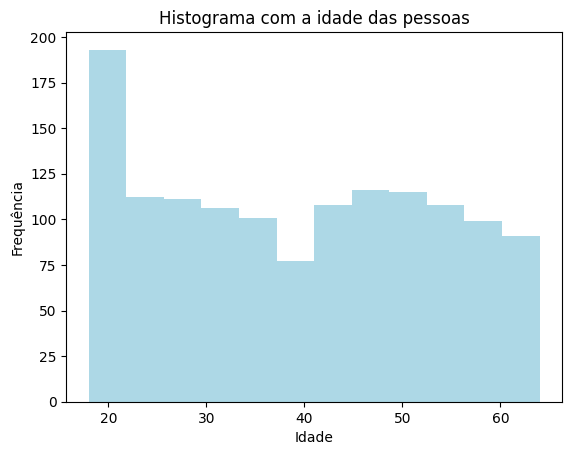

In [9]:
# Plotagem do histograma
plt.hist(df["age"], bins=12, color='lightblue')

# Configurações do gráfico
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Histograma com a idade das pessoas")

# Exibição do gráfico
plt.show()

## Gráfico com a distribuição das pessoas por sexo

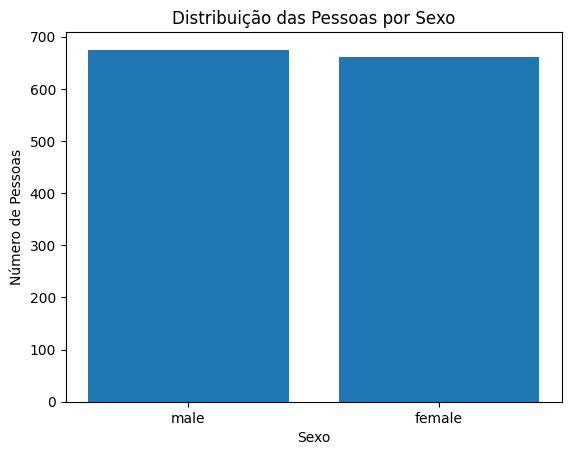

In [12]:
# Contagem dos valores na coluna "sex"
qtd = df["sex"].value_counts()

# Criação do gráfico de barras
plt.bar(qtd.index, qtd.values)

# Configurações do gráfico
plt.xlabel("Sexo")
plt.ylabel("Número de Pessoas")
plt.title("Distribuição das Pessoas por Sexo")
# Exibição do gráfico
plt.show()

## Gráfico de gastos por Região

<ipython-input-19-64e2567ece19>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["region"], y=df["charges"], palette = paleta)


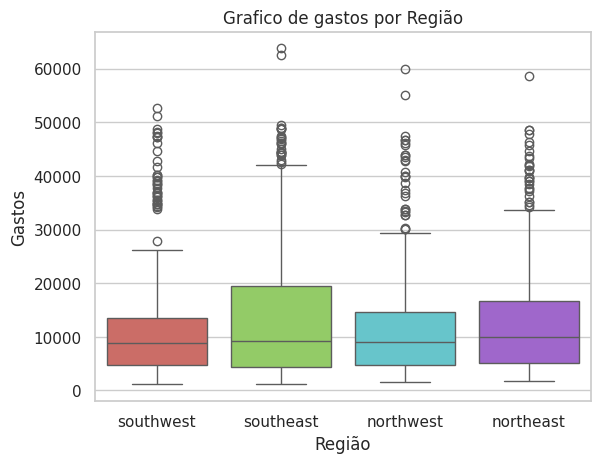

In [19]:
# Personalização
sns.set(style="whitegrid", color_codes = True)

# Definindo paleta de cores para as regiões
paleta = sns.color_palette("hls", len(df["region"].unique()))

# Criação do gráfico de boxplot
sns.boxplot(x=df["region"], y=df["charges"], palette = paleta)

# Configurações do gráfico
plt.xlabel("Região")
plt.ylabel("Gastos")
plt.title("Grafico de gastos por Região")

# Exibição do gráfico
plt.show()

## Gráfico de gasto por IMC

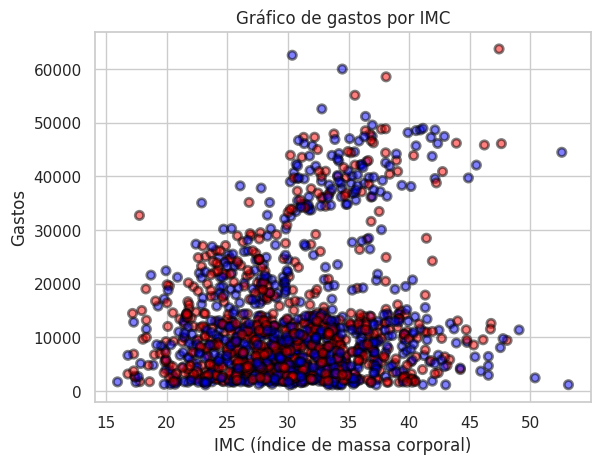

In [21]:
# Mapeamento de cores para sexo
colors = {"male": "blue", "female": "red"}

# Plotagem do gráfico de dispersão
plt.scatter(
    x=df["bmi"],
    y=df["charges"],
    c=df["sex"].map(colors),
    alpha=0.5,
    edgecolors="black",
    linewidths=2
)

# Configurações do gráfico
plt.xlabel("IMC (índice de massa corporal)")
plt.ylabel("Gastos")
plt.title("Gráfico de gastos por IMC")

# Exibição do gráfico
plt.show()

## Gráfico de pairplot

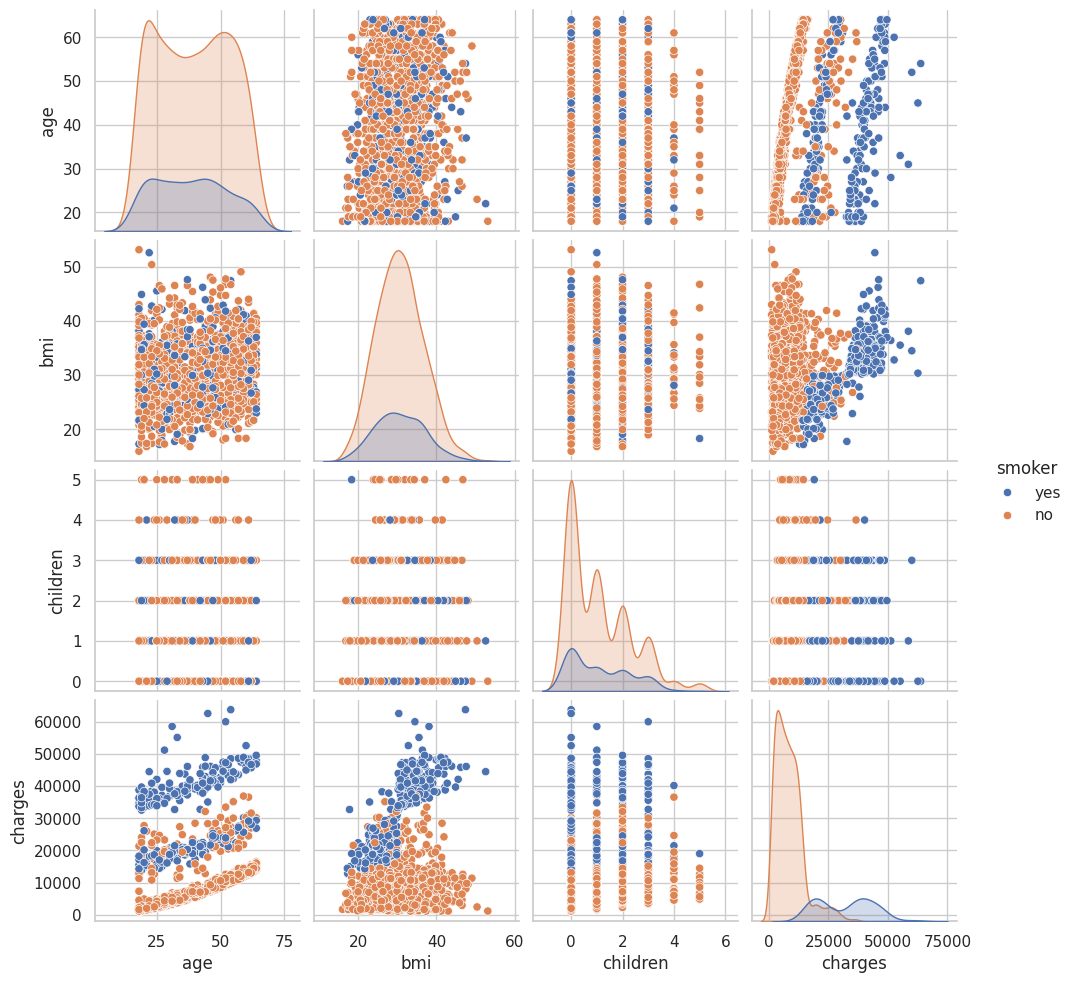

In [22]:
# Mapeamento de cores para fumante
colors = {"yes": "green", "no": "red"}

# Plotagem do pairplot
sns.pairplot(df, hue="smoker")
# Exibição do gráfico
plt.show()

## Minha compreensão sobre os gráficos

Pelo que se pode supor, pessoas estadunidenses entre 25 e 60 anos que fumam tendem a gastar mais. Isso tem relação com a idade, índice de massa corporal e, às vezes, se possui filho. Ou seja, a tarifa paga pelo seguro de saúde aumenta.
